<a href="https://colab.research.google.com/github/kkiprono4/Financial-Inclusion-Analysis/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_12_Kevin_Kiprono_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the Question

a) Specifying the Data Analytic Question

Which model can we use predict individuals who are most likely to have or use a bank account.

b) Defining the Metric for Success

The model will be regarded successful if it can effectively predict the individuals who are mostly likely to have or use commercial bank accounts.

c) Understanding the context


to solve the challenge of financial inclusion, in several regions across east Africa, i have been assigned to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

d) Recording the Experimental Design


1.reading in the datasets

2.checking the data for duplicates and missinng data

3.dropping of duplicates and removal filling in of missing data values with zero

4.Finding and dealing with outliers, anomalies, and missing data within the dataset.

5.Performing of univariate, bivariate and multivariate analysis recording of observations.

6.Challenge your solution by providing insights on how you can make improvements.

e) Data Relevance

The dataset used in the analysis has records of individuals from four East Africa countries; Kenya, Uganda, Tanzania and Rwanda in the year 2016, 2017 and 2018. Some of the information in the dataset include year, has a bank account, type of location, cell phone access, household size, gender, occupation, age, level of education, type of a job and marital status of the individuals. The data was collected from various Finscope surveys available online.

Importing the python libraries

In [ ]:
# Importing Pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

Loading the data set

In [ ]:
#creating a dataframe
#url = http://bit.ly/FinancialDataset

df = pd.read_csv('http://bit.ly/FinancialDataset')

Previewing the dataset

In [ ]:
#previewing the first five entries of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#previewing the lata five entries of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking the data types from each column
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#checking the number of records in the dataset
df.shape

(23524, 13)

In [ ]:
#checking the columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

Tidying the Dataset



Misssing values from the dataframe

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#dropping the null values
df.dropna(inplace=True)

In [ ]:
#checking if all null values have been dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#new shape after dropping null values
df.shape

(23343, 13)

Columns formatting

In [ ]:
# Renaming the columns: rectifying typing errors

df.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)

df.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [ ]:
#setting column names to lower case
df.columns = df.columns.str.lower()

In [ ]:
#removing the white spaces from the column names
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
#confirming the changes in the column names
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Outliers

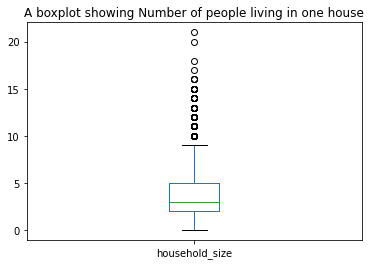

In [ ]:
# checking for outliers on the variable (Household_size) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart

df.boxplot(['household_size'],grid = False)
plt.title("A boxplot showing Number of people living in one house")
plt.show()


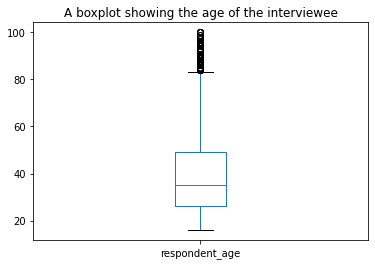

In [ ]:
# checking for outliers on the variable (respondent_age) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart

df.boxplot(['respondent_age'],grid = False)
plt.title("A boxplot showing the age of the interviewee")
plt.show()


Anomalies

In [ ]:
#checking for anomalies
# the data description of the year column  only included(2016,2017,2018)
anomaly = df.loc[df['year'] > 2018].index
anomaly

# Removing the anomalies on the year column
df.drop(anomaly, inplace = True)

In [ ]:
# checking that there are no anomalies in the year column

df.year.unique()

array([2018, 2016, 2017])

Exploratory Data Analysis

Univariate Analysis

Measure of central tendency

Mean

In [ ]:
# Mean of the respondent household_size

df['household_size'].mean()

3.688560411311054

In [ ]:
# Mean of the respondent respondent_age

df.respondent_age.mean()


38.80706940874036

Mode

In [ ]:
# mode of the respondent household_size

df.household_size.mode()


0    2.0
dtype: float64

In [ ]:
# mode of the respondent_age

df.respondent_age.mode()

0    30.0
dtype: float64

Median

In [ ]:
# median of the respondent household_size

df.household_size.median()


3.0

In [ ]:
# median of the respondent_age

df.respondent_age.median()


35.0

Measures of Dispersion/Variability/Spread

Quantiles

In [ ]:
# Quantiles of the household_size

df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Quantiles of the respondent_age

df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

Range

In [ ]:
# Range of the household_size

householdMax = df.household_size.max()
print(householdMax)

householdMin = df.household_size.min()
print(householdMin)

householdRange = householdMax - householdMin
householdRange

21.0
0.0


21.0

In [ ]:
# Range of the respondent_age

ageMax = df.respondent_age.max()
print(ageMax)

ageMin = df.respondent_age.min()
print(ageMin)

ageRange = ageMax - ageMin
ageRange

100.0
16.0


84.0

STANDARD DEVIATION

In [ ]:
# Standard Deviation of the household_size

df.household_size.std()

2.2812745975350435

In [ ]:
# Standard Deviation of the respondent_age

df.respondent_age.std()

16.519904564514412

VARIANCE 

In [ ]:
# Variance of the household_size

df.household_size.var()

5.204213789358675

In [ ]:
# Variance of the respondent_age

df.respondent_age.var()



272.90724682066417

SKEWNESS 

In [ ]:
# Skewness of the household_size

df.household_size.skew()

0.9741827150450616

In [ ]:
# Skewness of the respondent_age


df.respondent_age.skew()

0.8406145812311228

KURTOSIS 

In [ ]:
# Kurtosis of the household_size

df.household_size.kurt()


1.1538357462528523

In [ ]:
# Kurtosis of the respondent_age

df.respondent_age.kurt()


0.09826807013177241

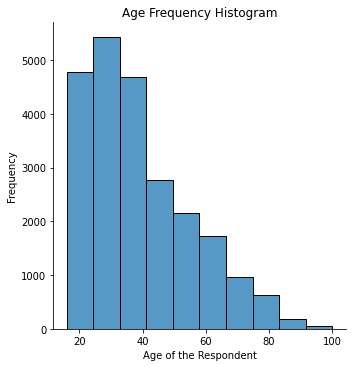

In [ ]:
#Visual look at the age data
sns.displot(df['respondent_age'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Age of the Respondent")
plt.title("Age Frequency Histogram")
plt.show()

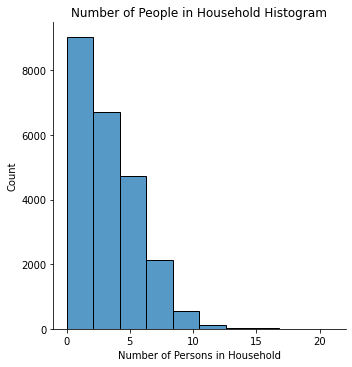

In [ ]:
#Visual look at the household data
sns.displot(df['household_size'], kind='hist',bins=10, kde=False)
plt.ylabel("Count")
plt.xlabel("Number of Persons in Household")
plt.title("Number of People in Household Histogram")
plt.show()

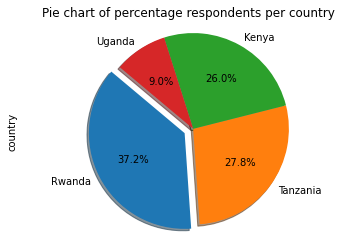

In [ ]:
#pie chart for countries
explode = (0.1, 0, 0, 0) 
df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', explode=explode, shadow = True, startangle = 140 )

plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()

BIVARIATE

Visualization

Scatter Plots

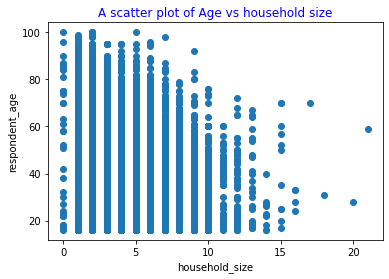

In [ ]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# plotting our scatterplot using matplotlib
plt.scatter(df['household_size'], df['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()


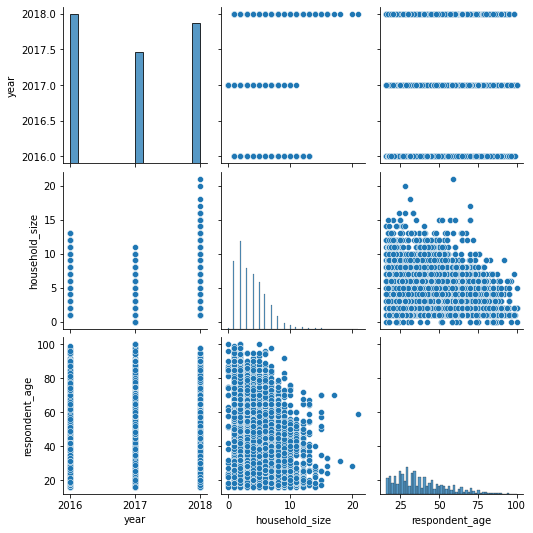

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df)
plt.show()

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df['respondent_age'].corr(df["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["respondent_age"].corr(df["household_size"]) 
print(coeff)

-0.11967115234154871
-0.11967115234154871


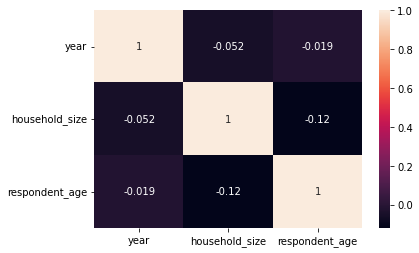

In [ ]:
#Heat Map
sns.heatmap(df.corr(),annot=True)
plt.show()

Multivariate Analysis

PCA Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['household_size', 'respondent_age']])
scaled_data = scaler.transform(df[['household_size', 'respondent_age']])

In [ ]:
scaled_data = pd.DataFrame(scaled_data)

In [ ]:
df1 = scaled_data.fillna(0)
df1.head()

,0,1
0,-0.301838,-0.896336
1,0.574884,1.888243
2,0.574884,-0.775267
3,0.574884,-0.290993
4,1.889966,-0.775267


In [ ]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df1)
pca_x = logmodel.transform(df1)

In [ ]:
pca_x

array([[ 0.42037369, -0.84723696],
       [-0.92868544,  1.74169382],
       [ 0.95470104, -0.14169265],
       ...,
       [ 0.91189681, -0.09888842],
       [ 1.40341992,  0.64946013],
       [ 2.76136605,  1.15132149]])